In [1]:
import pandas as pd
import graphviz
from graphviz import Graph
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from six import StringIO  
import pydotplus
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
label = pd.read_pickle('final.pkl')
label.drop('cluster_label',axis=1,inplace=True)
label

,CUSTNO,spent_less,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,...,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
0,1,0.0,0.000000,0.0,-0.000052,-0.000102,0.0,0.00000,0.000000,0.0,...,0.000,0.000,3.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2,1.0,0.001966,0.0,-0.000142,0.000000,0.0,-0.00036,0.000000,0.0,...,0.000,0.000,2.0,0.0,0.0,5.0,2.0,0.0,0,0
2,4,0.0,0.000000,0.0,0.000000,0.000253,0.0,0.00000,0.000000,0.0,...,0.000,0.000,1.0,0.0,0.0,1.0,0.0,0.0,0,0
3,6,1.0,0.000348,0.0,0.000037,-0.000011,0.0,0.00000,0.000000,0.0,...,0.000,0.000,12.0,0.0,4.0,1.0,0.0,0.0,0,0
4,7,1.0,0.000114,0.0,-0.000813,-0.000187,0.0,0.00000,0.000000,0.0,...,0.000,0.000,5.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,19369,1.0,0.000010,0.0,-0.000010,0.000000,0.0,0.00000,0.000971,0.0,...,0.033,0.000,0.0,0.0,0.0,3.0,0.0,0.0,0,0
16291,19371,0.0,0.000000,0.0,0.000000,-0.000083,0.0,0.00000,0.000000,0.0,...,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0,1
16292,19372,0.0,-0.000282,0.0,-0.000065,0.000144,0.0,0.00000,0.000000,0.0,...,0.000,-0.011,17.0,1.0,7.0,0.0,0.0,1.0,0,0
16293,19373,0.0,-0.000024,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000,0.000,2.0,0.0,0.0,0.0,0.0,0.0,0,0


In [3]:
import pandas as pd
df = pd.read_pickle('clustering_result(0_1_sales_reduced).pkl')
df

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP,labels
0,1,9,0,9336600,43,60,0,1,0,0
1,4,9,1,1961650,18,16,0,1,0,0
2,8,9,0,566800,8,10,0,1,0,0
3,9,9,1,28180290,102,100,0,0,0,0
4,13,9,1,136300,2,210,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,100,0,0,1,1
9520,19364,2,1,253600,1,210,0,0,1,1
9521,19371,7,1,148000,1,52,0,0,1,3
9522,19372,4,1,4962200,41,100,0,1,0,4


In [4]:
df_labels = df[['labels','CUSTNO']]
data = pd.merge(df_labels,label,how = 'inner')

In [5]:
# df = cluster변수들의 데이터
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

df1.labels[df1.labels!=0] = 1
df2.labels[df2.labels!=1] = 0
df3.labels[df3.labels!=2] = 0
df4.labels[df4.labels!=3] = 0
df5.labels[df5.labels!=4] = 0

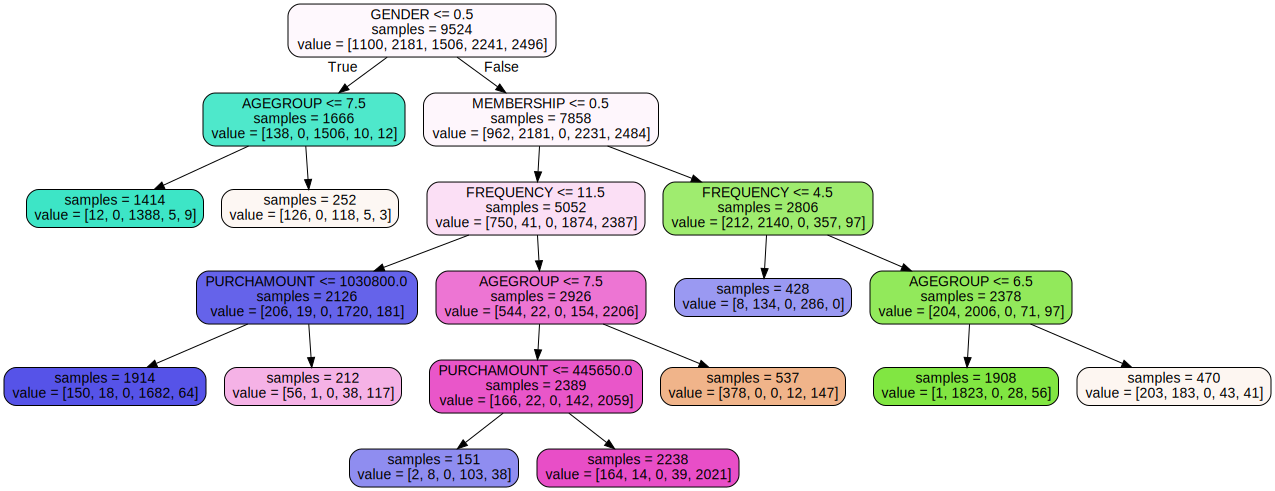

In [6]:
X_features = df.drop(['labels','CUSTNO'],axis=1)
y_label =  df.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 100, max_features=8,max_depth=15,max_leaf_nodes=10, random_state=11)
dt_tree.fit(X_features,y_label)
export_graphviz(dt_tree, out_file="tree.dot", feature_names=X_features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#1번그룹  - 나이가많은 남자 100명, 
#(중간그룹) 멤버십을 가입하지않은 여성700/ 가입자 200명

# 2번그룹 - 멤버십 가입자, FREQUENCY가 4.5이상,  AGEGROUP이 6.5기준 이하인그룹(젊은층)

# 3번그룹 - 남자인그룹 (젊은층이많음)

# 4번그룹 - 멤버십 미가입자, FREQUENCY가 작음 11.5기준, 비교적 돈을 많이 소비하지 않은 그룹
#           - 소규모 멤버십 가입자 - 

# 5번그룹 - 멤버십 미가입자 FREQUENCY 11.5이상그룹,
# AGEGROUP이 7.5이하인그룹,  비교적 돈을 많이 소비한그룹


# 4    2496
# 3    2241
# 1    2181
# 2    1506
# 0    1100

In [7]:
data.drop('spent_less',axis=1,inplace=True)
data.drop('CUSTNO',axis=1,inplace=True)

data.iloc[:,1:15] = data.iloc[:,1:15]*10000 #Purchdiff *10000을해줌
data.iloc[:,16:30] = data.iloc[:,16:30]*91   #가을시즌 총 방문횟수로 변경

In [8]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()
data5 = data.copy()
# data = 기존데이터 1~5 까지 분류 (나중 중요한 cluster는 본모델에 하나씩 돌려보기 위함.)
data1.labels[data1.labels!=0] = 1
data2.labels[data2.labels!=1] = 0
data3.labels[data3.labels!=2] = 0
data4.labels[data4.labels!=3] = 0
data5.labels[data5.labels!=4] = 0

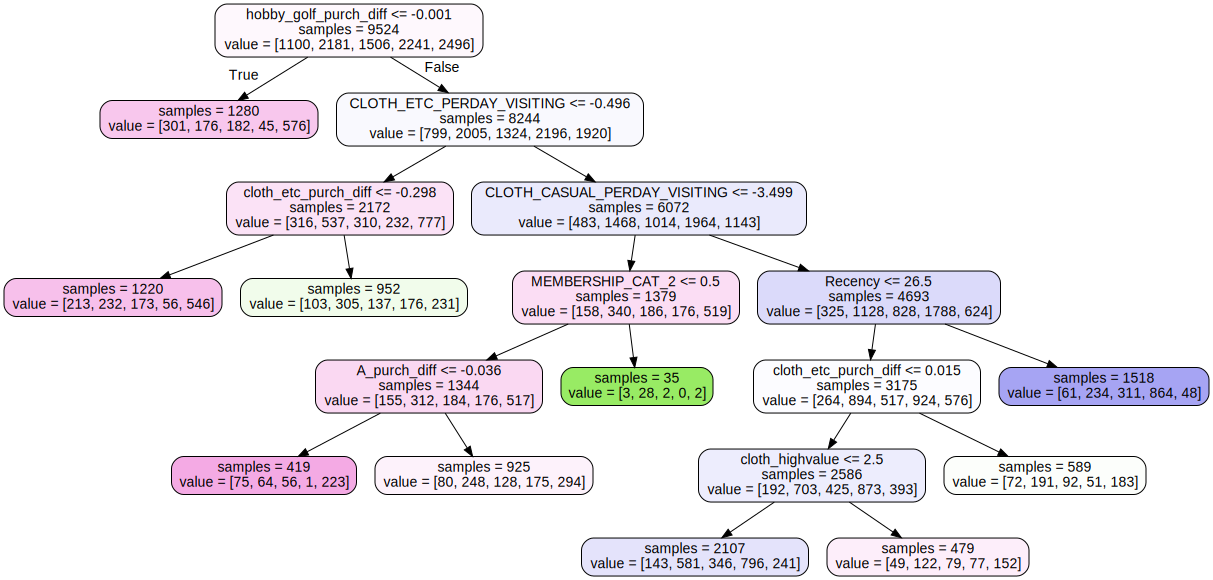

In [9]:
features = data.drop(['labels'],axis=1)
target=  data.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=20,max_leaf_nodes=10, random_state=11)
dt_tree.fit(features,target)

export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

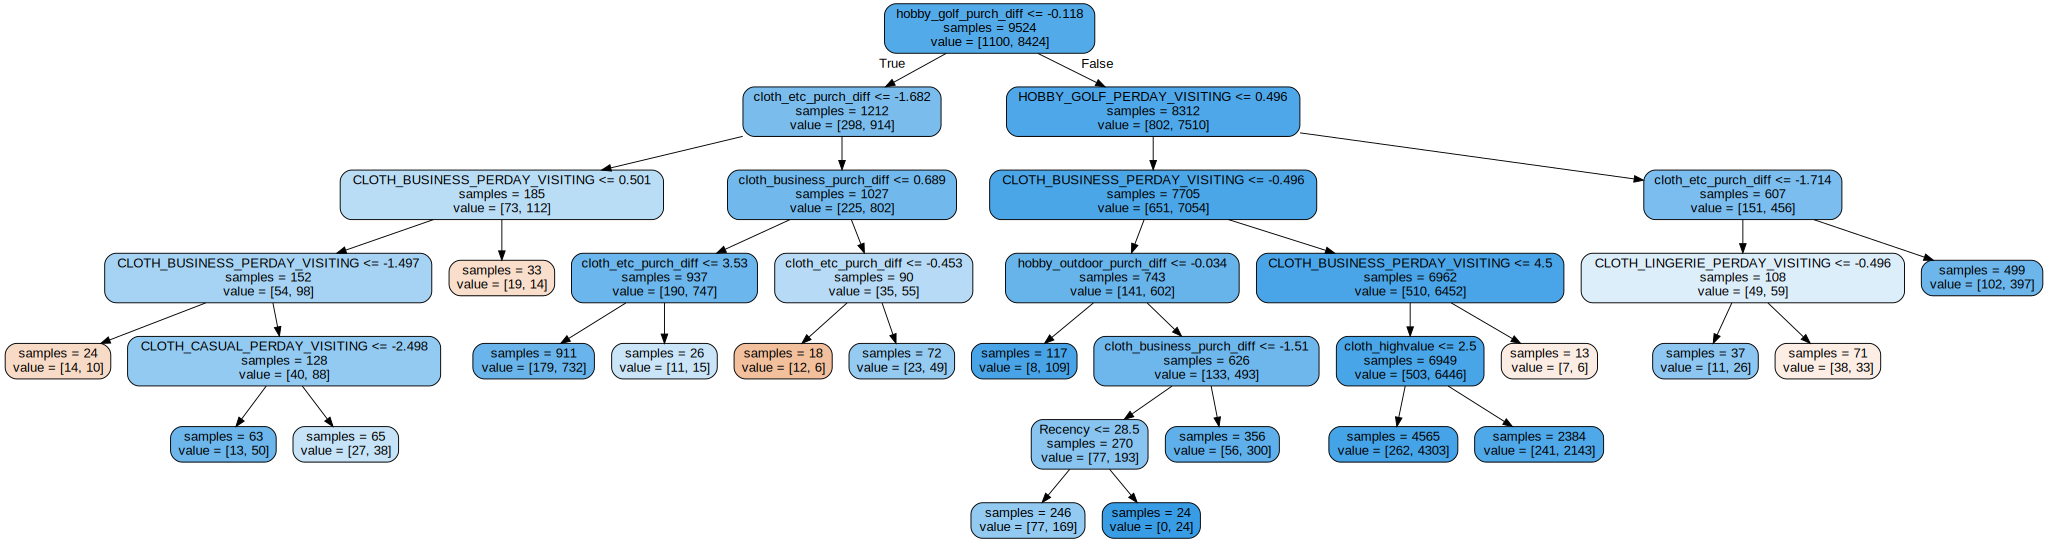

In [10]:
features = data1.drop(['labels'],axis=1)
target=  data1.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=8,max_depth=15,max_leaf_nodes=18, random_state=11)
dt_tree.fit(features,target)
export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#1번그룹 (중간그룹 -남성 100명 / 여성 1000명)(멤버십가입자 200명/ 미가입자 900명)
    #- 취미_골프 purch_diff가 -0.0000118기준 증가보이는사람이 많다(70%)
    #- 취미_골프 purch_diff가 0.000000009기준 감소고객이 많다(60%) - 즉 hobby_골프변동성이 적다
    #- 비즈니스 의류 방문횟수의 증감이 -0.496을 기준으로 유지 혹은 증가한고객이 많다(80%)
    #- 거의 모든게 다 반반으로 나누어진다

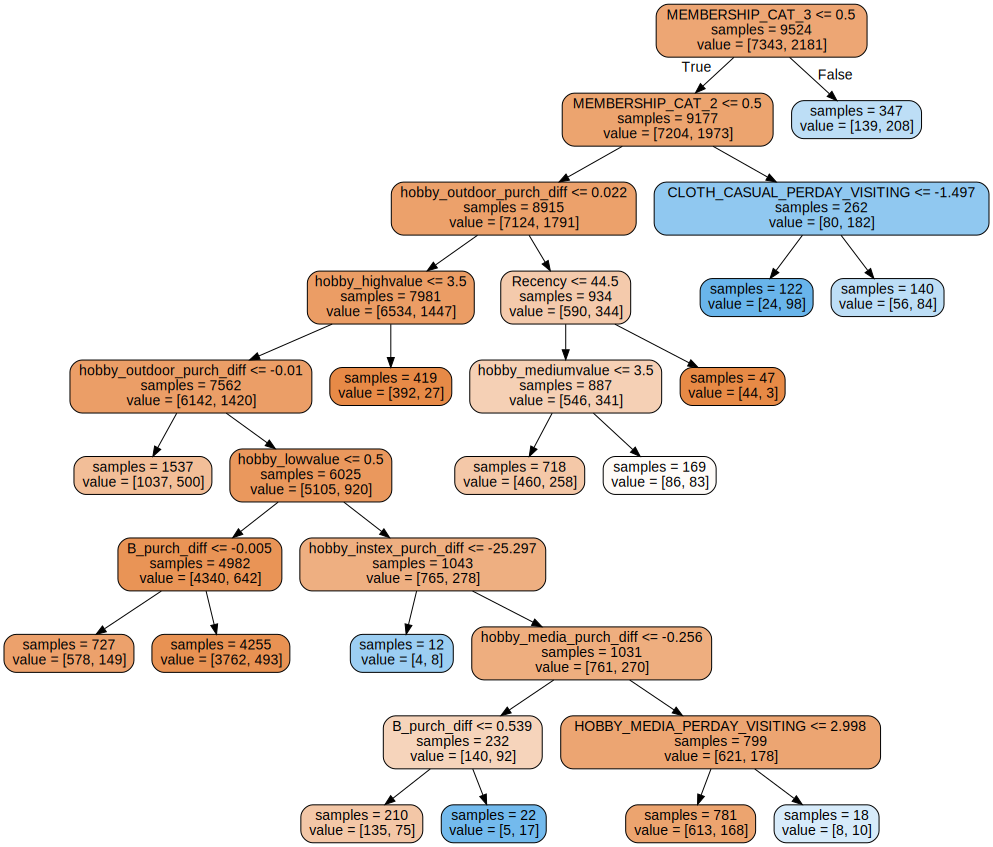

In [11]:
features = data2.drop(['labels'],axis=1)
target=  data2.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=10,max_leaf_nodes=15, random_state=11)
dt_tree.fit(features,target)

export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#2번그룹(멤버십 가입자, FREQUENCY가 4.5이상,  AGEGROUP이 6.5기준 이하인그룹(젊은층))

#1.hobby_media_purch_diff -0.00000001기준 증가고객이 많음
#2.중가취미물품의 변동이 큼
#3.취미 OUTDOOR 가을시즌 총 방문횟수의 증감이 그대로이거나 감소한사람이 많음
#4.취미 MEDIA 가을시즌 총 방문횟수의 증감이 그대로이거나 증가한사람이 많음.
#5. RECENCY기준 <= 40.5 인사람들이 대부분(95%)

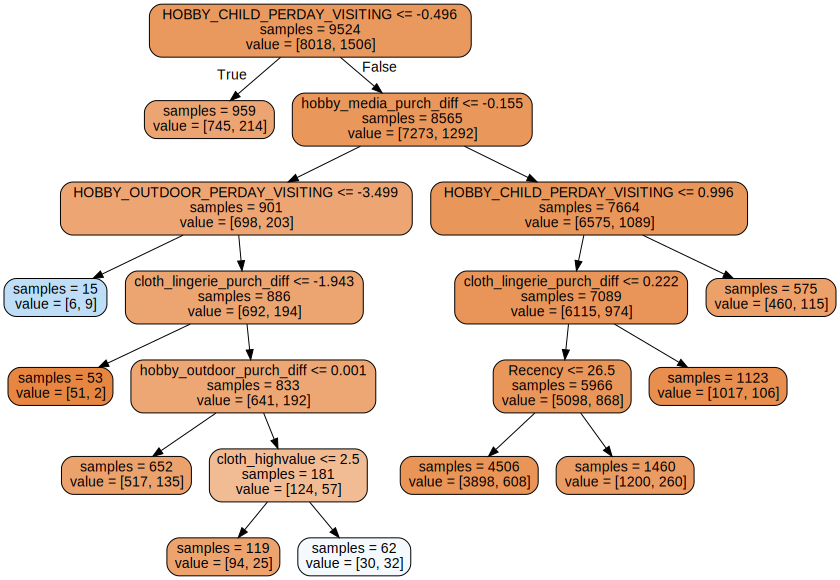

In [12]:
features = data3.drop(['labels'],axis=1)
target=  data3.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 15, max_features=20,max_depth=10,max_leaf_nodes=10, random_state=11)
dt_tree.fit(features,target)
export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#3번그룹 (남성 - 비교적젊은그룹)
# -HOBBY MEDIA의 방문횟수가 그대로이거나 증가한사람이 많음(75%)
# -HOBBY MEDIA_purch_diff가 -0.0000155기준으로 증가한사람이 많음(75%)
# -HOBBY OUTDOOR_purch_diff가 -0.0000029를 기준으로 증가한사람이 많음( 70%)
# -취미 CHILD물품의 총방문횟수가 그대로이거나 증가한사람이 많음(80%)

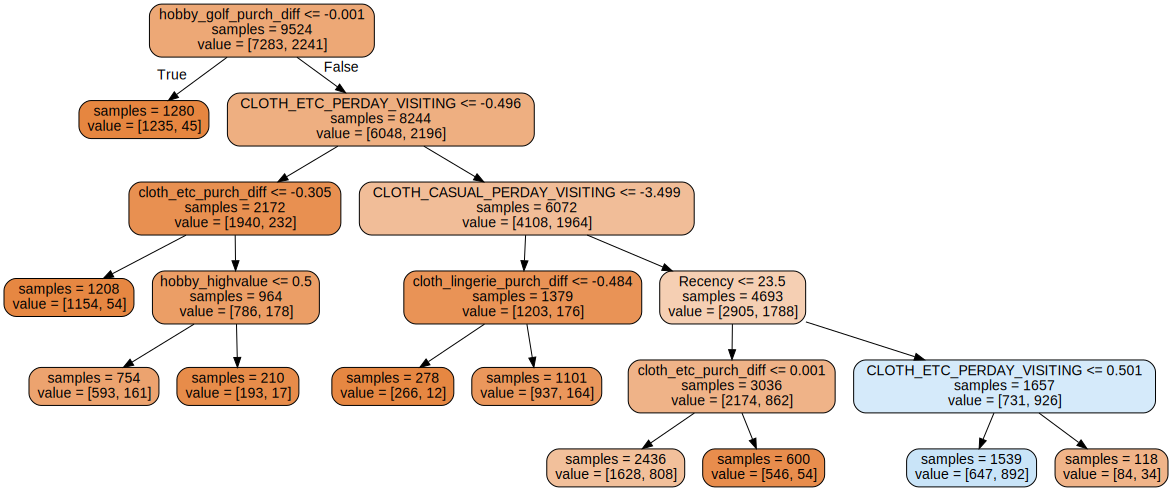

In [13]:
features = data4.drop(['labels'],axis=1)
target=  data4.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=5,max_leaf_nodes=10, random_state=11)
dt_tree.fit(features,target)
export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#4번그룹 멤버십 미가입자, FREQUENCY가 작음 11.5기준, 비교적 돈을 많이 소비하지 않은 그룹, 소규모 멤버십 가입자 -
           
    # cloth_etc_purch_diff -0.0000105 기준 증가(95%)
    #cloth_etc_purch_diff 0.0000011 기준 감소 (90%)
        # -> 즉 cloth_etc고객중 -0.00001 < x < 0.000001인 고객들임
    #취미_아동_가을총방문횟수가 감소하거나 유지고객이 많음(90%)
    #A_Purch_diff에서 유지 혹은 증가고객이 많다.
        # -> A_purch_diff -0.00000000001 < x < 0.0000042 (90%)
    #저가 취미물품 변동이 없는 고객이 많다(80%)
    #중가취미물품의 변동이 작은 고객이 많다(abs(15-14가 1이하인고객들))
    #고가취미물품의 변동이 없는 고객이 많다(85%)
    #A_purch_diff 가 -0.0000004를 기준 증가고객이 많다
    #고가의류의 변동이 2.5기준 크지않다
    #A제휴사를 많이 이용하는 고객들이 많은것으로 보인다.

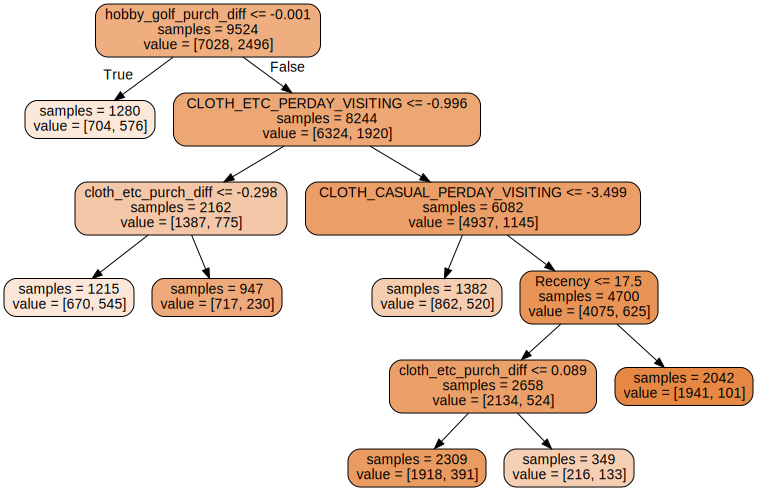

In [14]:
features = data5.drop(['labels'],axis=1)
target=  data5.labels
from sklearn.model_selection import train_test_split

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=5,max_leaf_nodes=7, random_state=11)
dt_tree.fit(features,target)
export_graphviz(dt_tree, out_file="tree.dot", feature_names=features.columns,\
                impurity=False, filled=True, rounded=True)

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#5번그룹  멤버십 미가입자 FREQUENCY 11.5이상그룹,AGEGROUP이 7.5이하인그룹,  비교적 돈을 많이 소비한그룹
 #중요그룹
    #의류_lingerie_purch_diff의 증가(0.0000679기준)가 많음 (feature = 5/ max_depth = 5)
    #의류_남성_가을방문횟수가 감소하거나 유지한사람이 많음
    #의류_캐주얼_가을방문횟수가 감소한사람이 많음

# 이미지 저장부분(추후 삭제 예정)

In [18]:
X_features = df.drop(['labels','CUSTNO'],axis=1)
y_label =  df.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 100, max_features=8,max_depth=15,max_leaf_nodes=10, random_state=11)
dt_tree.fit(X_features,y_label)

dot_data = StringIO()
export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = X_features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('group_label(0-5).png')




True

In [23]:
features = data1.drop(['labels'],axis=1)
target=  data1.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=8,max_depth=15,max_leaf_nodes=18, random_state=11)
dt_tree.fit(features,target)
dot_data = StringIO()

export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cluster1.png')

True

In [22]:
features = data2.drop(['labels'],axis=1)
target=  data2.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=10,max_leaf_nodes=15, random_state=11)
dt_tree.fit(features,target)
dot_data = StringIO()

export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cluster2.png')

True

In [24]:
features = data3.drop(['labels'],axis=1)
target=  data3.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=10,max_leaf_nodes=15, random_state=11)
dt_tree.fit(features,target)
dot_data = StringIO()

export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cluster3.png')

True

In [25]:
features = data4.drop(['labels'],axis=1)
target=  data.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=10,max_leaf_nodes=15, random_state=11)
dt_tree.fit(features,target)
dot_data = StringIO()

export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cluster4.png')

True

In [26]:
features = data5.drop(['labels'],axis=1)
target=  data5.labels

dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=10,max_leaf_nodes=15, random_state=11)
dt_tree.fit(features,target)
dot_data = StringIO()

export_graphviz(dt_tree,   # 의사결정나무 모형 대입
                                   out_file = dot_data,  # file로 변환할 것인가
                                   feature_names = features.columns,  # feature 이름
                                   filled = True,           # 그림에 색상을 넣을것인가
                                   rounded = True,          # 모서리 처리
                                   special_characters = False)   # 특수문자를 사용하나

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cluster5.png')

True